# Installing Libraries

In [26]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [27]:
data=pd.read_csv('climate_change_dataset.csv')

In [28]:
data.head(7)

Year    Country  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
0  2006         UK                   8.9                          9.3   
1  2019        USA                  31.0                          4.8   
2  2014     France                  33.9                          2.8   
3  2010  Argentina                   5.9                          1.8   
4  2007    Germany                  26.9                          5.6   
5  2020      China                  32.3                          1.4   
6  2006  Argentina                  30.7                         11.6   

   Sea Level Rise (mm)  Rainfall (mm)  Population  Renewable Energy (%)  \
0                  3.1           1441   530911230                  20.4   
1                  4.2           2407   107364344                  49.2   
2                  2.2           1241   441101758                  33.3   
3                  3.2           1892  1069669579                  23.7   
4                  2.4           1743   124079175                  12.5   
5                  2.7           2100  1202028857                  49.4   
6                  3.9           1755   586706107                  41.9   

   Extreme Weather Events  Forest Area (%)  
0                      14             59.8  
1                       8             31.0  
2                       9             35.5  
3                       7             17.7  
4                       4             17.4  
5                      12             47.2  
6                      10             50.5

In [29]:
data.tail(7)

Year       Country  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
993  2003  South Africa                  30.2                          8.5   
994  2018     Australia                  34.5                         14.6   
995  2019         India                  23.6                          8.0   
996  2000            UK                  21.8                         10.0   
997  2019     Argentina                  23.8                          8.9   
998  2016     Australia                  21.0                         14.9   
999  2011       Germany                  24.1                         17.3   

     Sea Level Rise (mm)  Rainfall (mm)  Population  Renewable Energy (%)  \
993                  2.9           1604  1168018187                  28.7   
994                  1.3            829  1211016796                   7.6   
995                  1.2           1365  1358019778                  10.0   
996                  2.2           1273   876123161                  14.9   
997                  4.7            891  1120533308                  25.9   
998                  3.1           1136   380662109                  24.5   
999                  2.1           2854   398407112                  41.0   

     Extreme Weather Events  Forest Area (%)  
993                       3             33.9  
994                       6             27.1  
995                       8             20.2  
996                      14             30.1  
997                      10             46.5  
998                       3             44.5  
999                       3             19.8

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB


In [31]:
data.describe

<bound method NDFrame.describe of      Year    Country  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
0    2006         UK                   8.9                          9.3   
1    2019        USA                  31.0                          4.8   
2    2014     France                  33.9                          2.8   
3    2010  Argentina                   5.9                          1.8   
4    2007    Germany                  26.9                          5.6   
..    ...        ...                   ...                          ...   
995  2019      India                  23.6                          8.0   
996  2000         UK                  21.8                         10.0   
997  2019  Argentina                  23.8                          8.9   
998  2016  Australia                  21.0                         14.9   
999  2011    Germany                  24.1                         17.3   

     Sea Level Rise (mm)  Rainfall (mm)  Population  Renewable En

# Cleaning Column Names

In [32]:
data.columns

Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)'],
      dtype='object')

In [33]:
new_column_names = {
    'Year': 'year',
    'Country': 'country',
    'Avg Temperature (°C)': 'avg_temp_c',
    'CO2 Emissions (Tons/Capita)': 'co2_emissions_tons_per_capita',
    'Sea Level Rise (mm)': 'sea_level_rise_mm',
    'Rainfall (mm)': 'rainfall_mm',
    'Population': 'population',
    'Renewable Energy (%)': 'renewable_energy_pct',
    'Extreme Weather Events': 'extreme_weather_events',
    'Forest Area (%)': 'forest_area_pct'
}
data.rename(columns=new_column_names, inplace=True)
print("Renamed columns ")
print(data.head())

Renamed columns 
   year    country  avg_temp_c  co2_emissions_tons_per_capita  \
0  2006         UK         8.9                            9.3   
1  2019        USA        31.0                            4.8   
2  2014     France        33.9                            2.8   
3  2010  Argentina         5.9                            1.8   
4  2007    Germany        26.9                            5.6   

   sea_level_rise_mm  rainfall_mm  population  renewable_energy_pct  \
0                3.1         1441   530911230                  20.4   
1                4.2         2407   107364344                  49.2   
2                2.2         1241   441101758                  33.3   
3                3.2         1892  1069669579                  23.7   
4                2.4         1743   124079175                  12.5   

   extreme_weather_events  forest_area_pct  
0                      14             59.8  
1                       8             31.0  
2                       9     

# Mean of parameters by year

In [34]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
yearly_summary = data.groupby('year')[numeric_cols].mean()
print(yearly_summary)

        year  avg_temp_c  co2_emissions_tons_per_capita  sea_level_rise_mm  \
year                                                                         
2000  2000.0   20.501887                      11.224528           2.939623   
2001  2001.0   20.117073                       9.929268           3.273171   
2002  2002.0   21.433333                       9.933333           2.952941   
2003  2003.0   18.219512                      11.085366           2.934146   
2004  2004.0   18.804000                      10.000000           2.790000   
2005  2005.0   19.532432                       8.537838           2.937838   
2006  2006.0   19.805128                      10.497436           3.056410   
2007  2007.0   20.562500                      10.335000           2.822500   
2008  2008.0   19.144444                      10.375000           3.030556   
2009  2009.0   19.730303                      10.363636           2.760606   
2010  2010.0   17.963333                       9.873333         

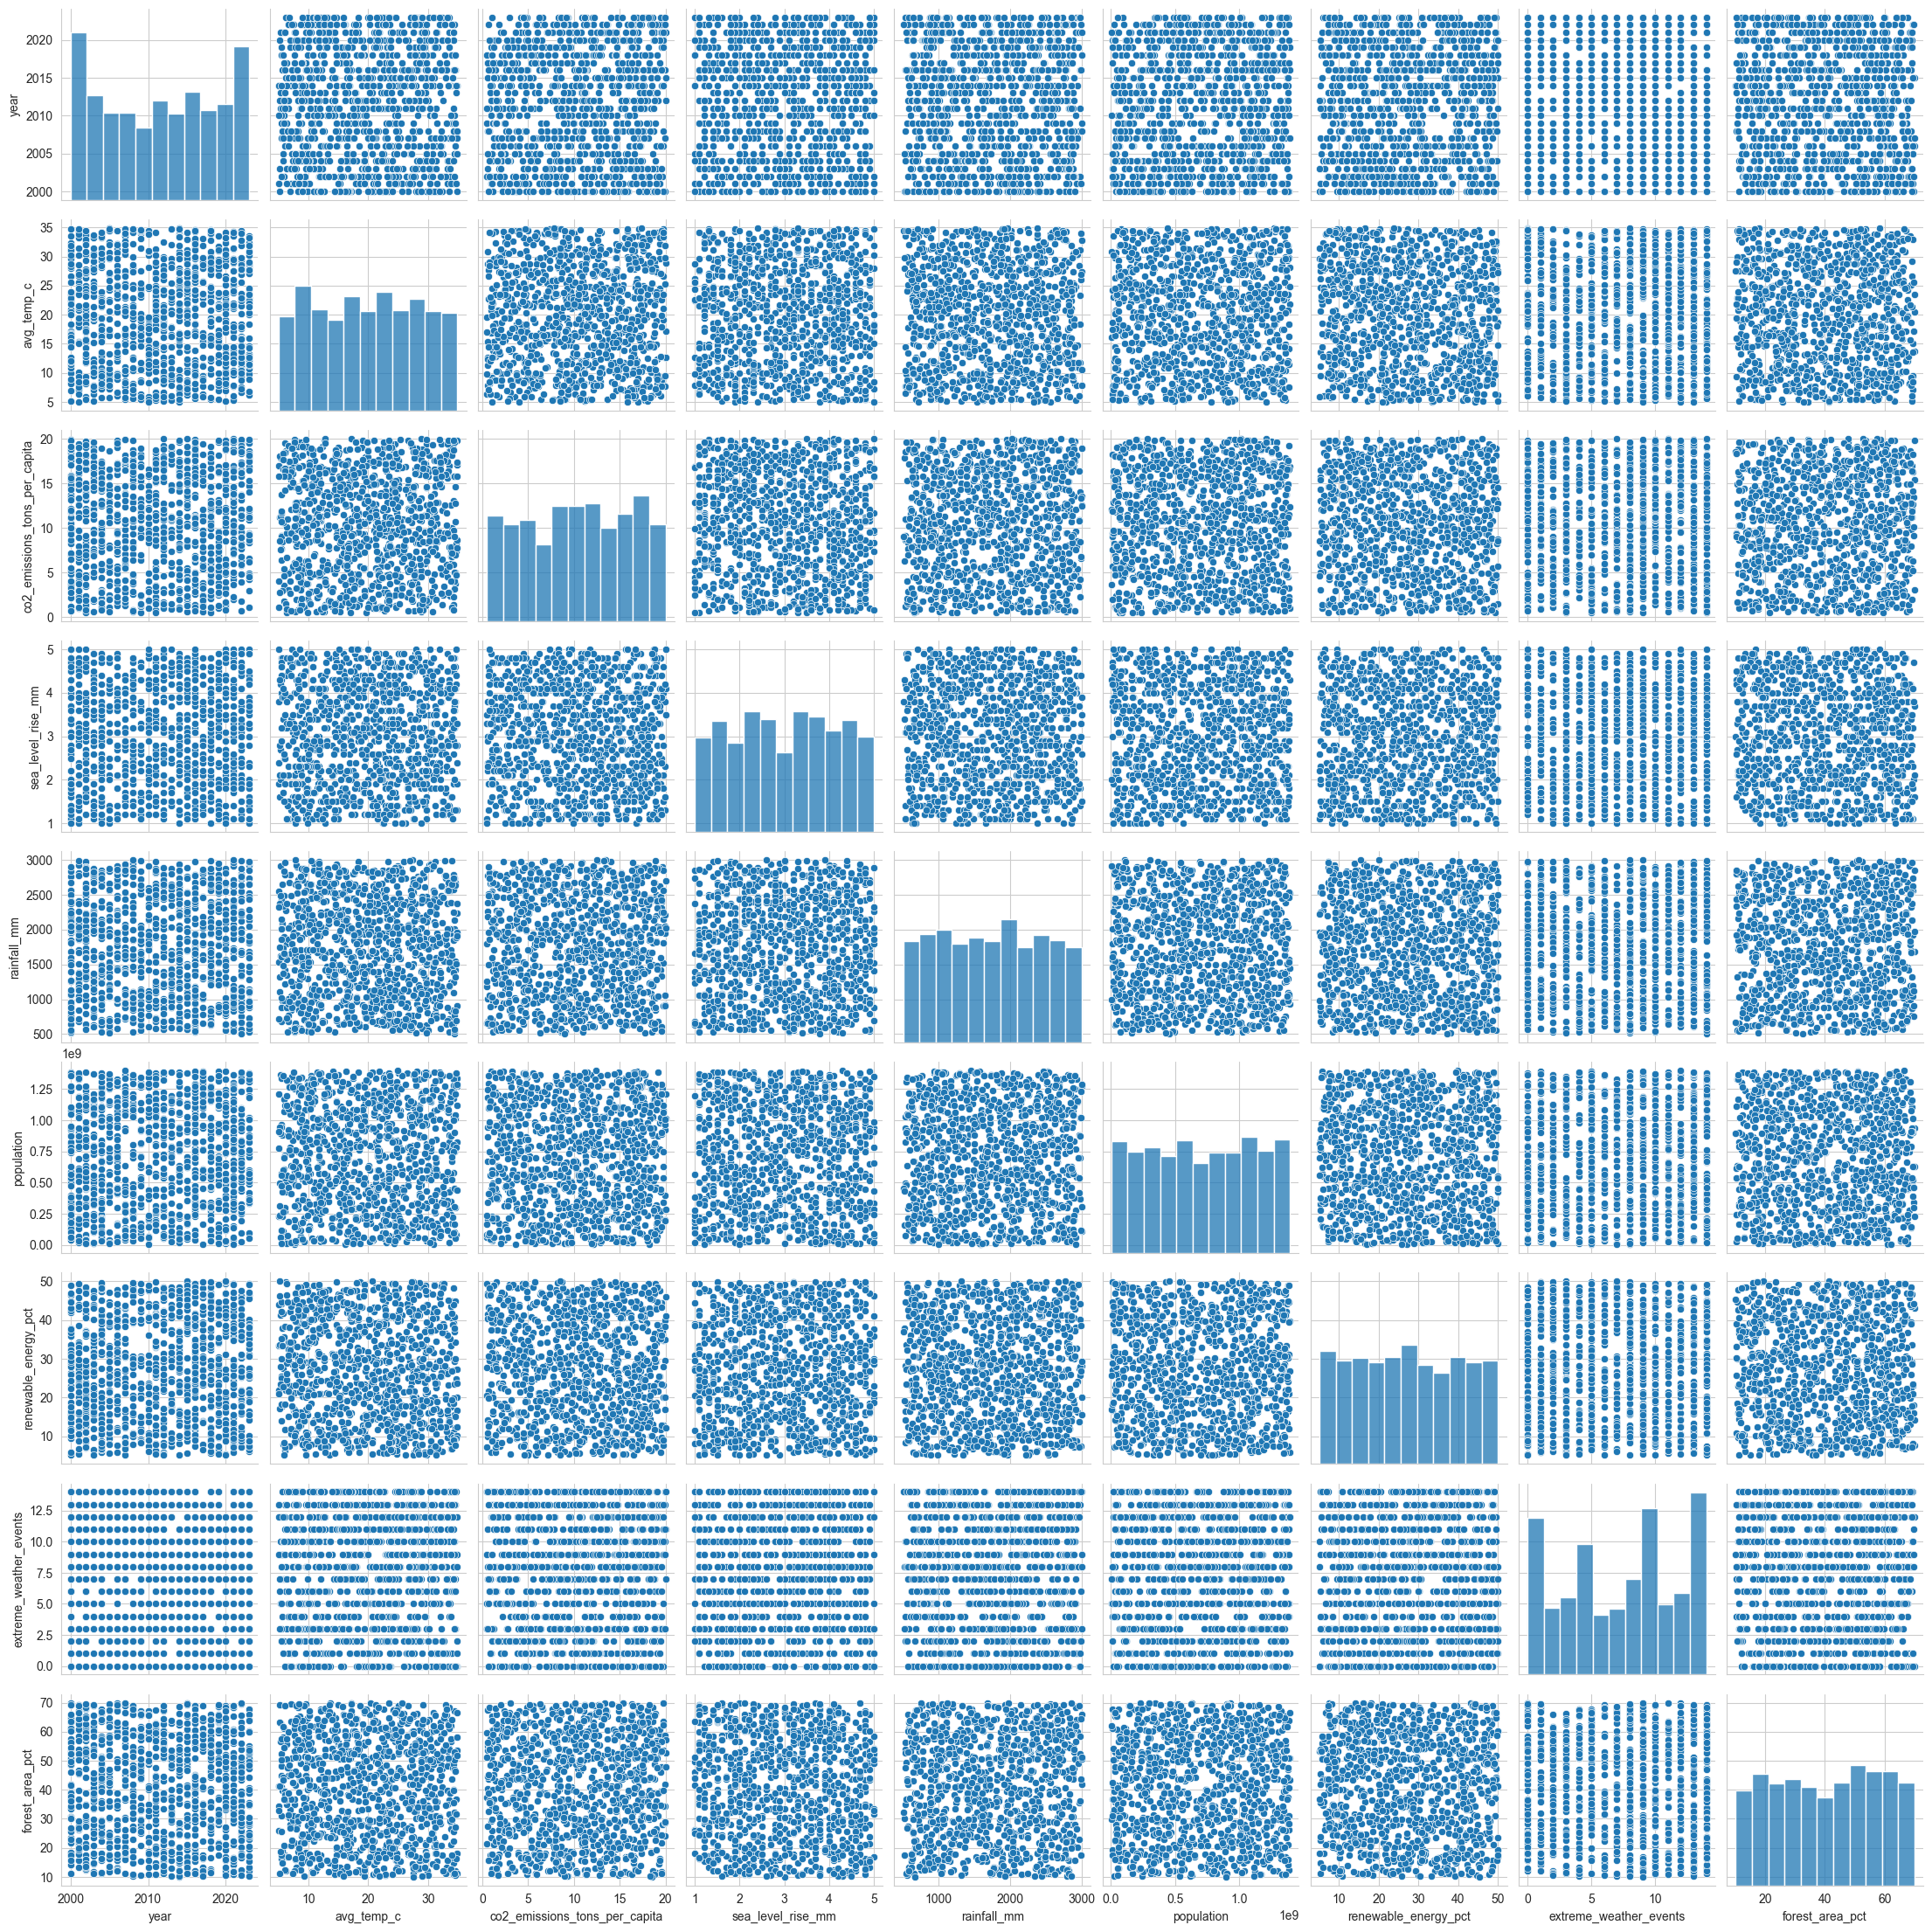

In [35]:
sns.pairplot(data)
plt.show()

# The pairplot provides an overview of relationships between climate indicators across years:

1. No Strong Outliers Visible

    The scatter plots don’t show extreme points far from the main distribution.

    Most variables (temperature, CO₂ emissions, rainfall, renewable energy, etc.) are bounded within expected ranges.

    This suggests the dataset is fairly clean and doesn’t suffer from abnormal measurement spikes.

2. Histograms Along the Diagonal

     Year is evenly distributed → the dataset covers a consistent spread across time.

     avg_temp_c and co2_tons_per_capita are moderately spread but without skewed tails.

    Rainfall and population histograms show natural variation but not irregular extremes.

3. Weak Pairwise Relationships

    Scatter plots don’t show clear linear correlations (e.g., temperature vs CO₂, population vs rainfall).

    This means single-variable pair correlations are weak — we may need multivariate or temporal analysis (e.g., trends over time) to detect patterns.

    Renewable Energy (%) vs CO₂

   No obvious trend in scatterplots; indicates renewable adoption alone may not explain CO₂ emissions globally without considering country-specific  
   factors.

4. Extreme Weather Events

  Plots show discrete jumps (since counts are integers), but values cluster within reasonable ranges. No year seems to have unrealistic event counts.

 The dataset shows no obvious outliers in the pairwise distributions. Relationships between most indicators appear complex and non-linear, suggesting that simple correlations may not capture the climate dynamics. Deeper analysis (trend lines, regressions, or country-level breakdowns) would be needed to uncover meaningful dependencies.

#  Handle Missing Values 

In [36]:
print("Handling Missing Values ")
print("Missing values before cleaning:")
print(data.isnull().sum())
print("There is no missing values, so no cleaning needed")


Handling Missing Values 
Missing values before cleaning:
year                             0
country                          0
avg_temp_c                       0
co2_emissions_tons_per_capita    0
sea_level_rise_mm                0
rainfall_mm                      0
population                       0
renewable_energy_pct             0
extreme_weather_events           0
forest_area_pct                  0
dtype: int64
There is no missing values, so no cleaning needed


# Remove Duplicates


In [37]:
duplicate_rows_before = data.duplicated().sum()
print("Found and removed " + str(duplicate_rows_before) + " duplicate rows.")
data.drop_duplicates(inplace=True)

Found and removed 0 duplicate rows.


# Cleaned Dataset

In [38]:
data.reset_index(drop=True, inplace=True)
print(" Final Cleaned DataFrame ")
print(data.head())



 Final Cleaned DataFrame 
   year    country  avg_temp_c  co2_emissions_tons_per_capita  \
0  2006         UK         8.9                            9.3   
1  2019        USA        31.0                            4.8   
2  2014     France        33.9                            2.8   
3  2010  Argentina         5.9                            1.8   
4  2007    Germany        26.9                            5.6   

   sea_level_rise_mm  rainfall_mm  population  renewable_energy_pct  \
0                3.1         1441   530911230                  20.4   
1                4.2         2407   107364344                  49.2   
2                2.2         1241   441101758                  33.3   
3                3.2         1892  1069669579                  23.7   
4                2.4         1743   124079175                  12.5   

   extreme_weather_events  forest_area_pct  
0                      14             59.8  
1                       8             31.0  
2                    

In [39]:
print("Final data info:")
data.info()

Final data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           1000 non-null   int64  
 1   country                        1000 non-null   object 
 2   avg_temp_c                     1000 non-null   float64
 3   co2_emissions_tons_per_capita  1000 non-null   float64
 4   sea_level_rise_mm              1000 non-null   float64
 5   rainfall_mm                    1000 non-null   int64  
 6   population                     1000 non-null   int64  
 7   renewable_energy_pct           1000 non-null   float64
 8   extreme_weather_events         1000 non-null   int64  
 9   forest_area_pct                1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB


In [40]:
# Save the cleaned DataFrame to a new CSV file
data.to_csv('cleaned_data.csv', index=False)

# Distribution of renewable energy usage percentages across all countries

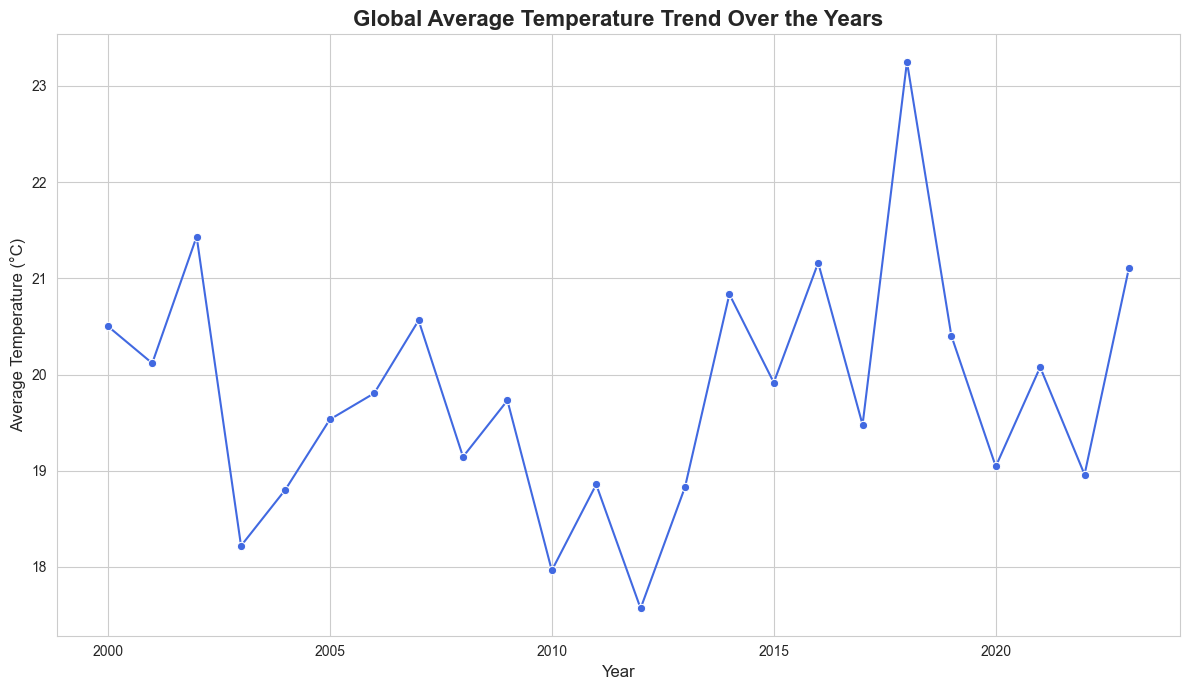

In [41]:
sns.set_style("whitegrid")
# Group data by 'year' and calculate the mean 'avg_temp_c'
yearly_avg_temp = data.groupby('year')['avg_temp_c'].mean().reset_index()
# Create the line plot
plt.figure(figsize=(12, 7))
sns.lineplot(data=yearly_avg_temp, x='year', y='avg_temp_c', marker='o', color='royalblue')
plt.title('Global Average Temperature Trend Over the Years', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.tight_layout()
plt.show()

#  Distribution of renewable energy usage percentages across all countries



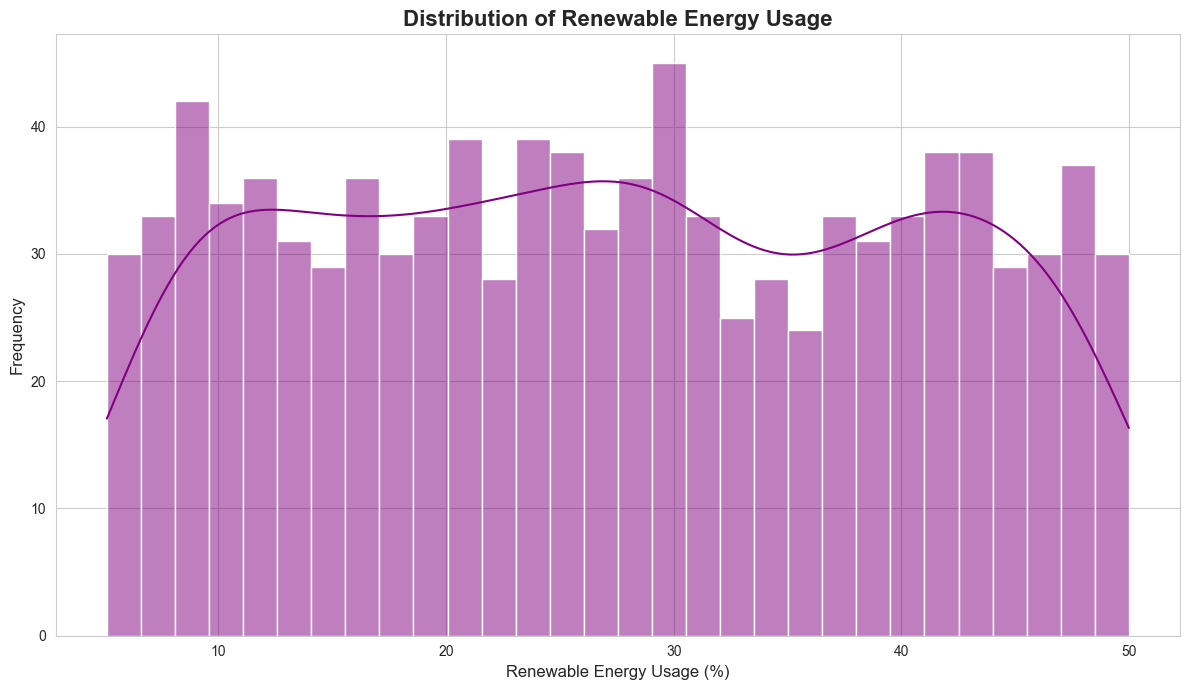

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
sns.histplot(data['renewable_energy_pct'], bins=30, kde=True, color='purple')
plt.title('Distribution of Renewable Energy Usage', fontsize=16, weight='bold')
plt.xlabel('Renewable Energy Usage (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# Relation between a country's CO2 emissions per capita and its average temperature

The correlation between CO2 Emissions and Average Temperature is: 0.01


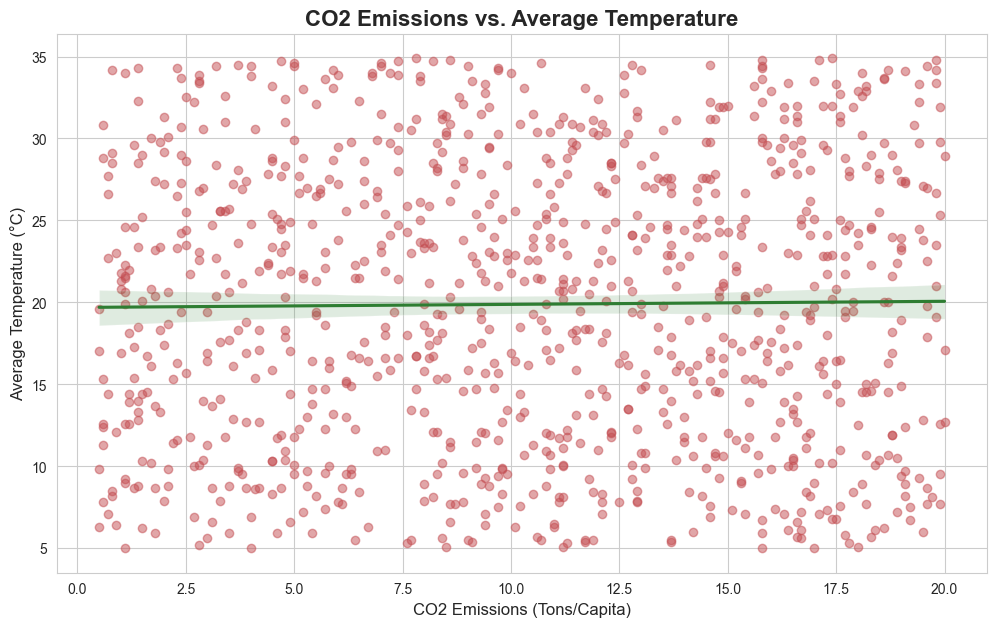

In [43]:
correlation = data['co2_emissions_tons_per_capita'].corr(data['avg_temp_c'])
print(f"The correlation between CO2 Emissions and Average Temperature is: {correlation:.2f}")
plt.figure(figsize=(12, 7))
sns.regplot(data=data, 
            x='co2_emissions_tons_per_capita', 
            y='avg_temp_c', 
            scatter_kws={'alpha':0.5, 'color':'#c44e52'}, 
            line_kws={'color':'#2e7d32'})
plt.title('CO2 Emissions vs. Average Temperature', fontsize=16, weight='bold')
plt.xlabel('CO2 Emissions (Tons/Capita)', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.show()

 #  Percentage of forest area relate to the number of extreme weather events

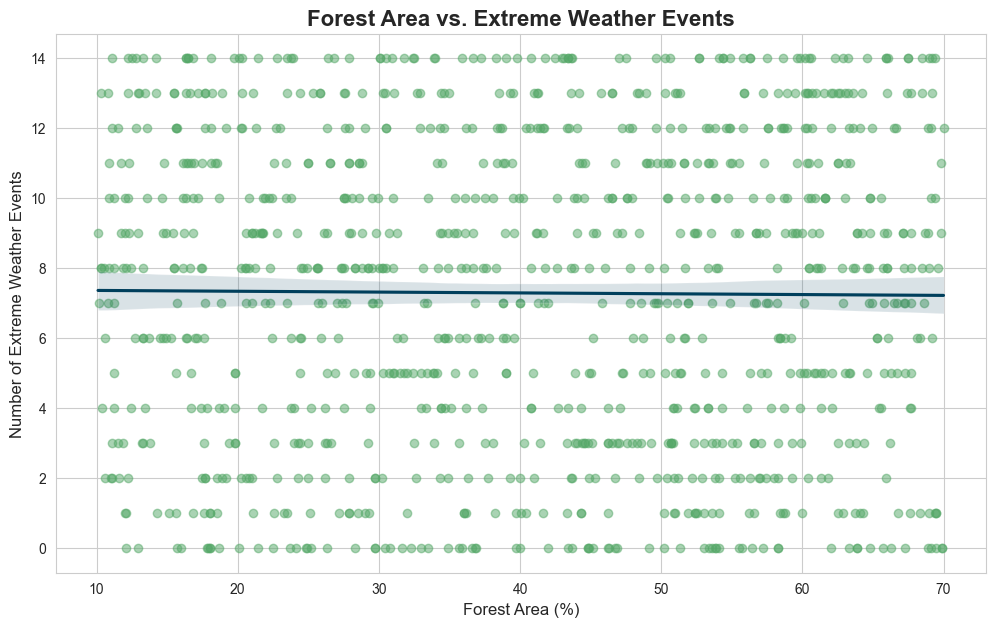

In [44]:
plt.figure(figsize=(12, 7))
sns.regplot(data=data, 
            x='forest_area_pct', 
            y='extreme_weather_events', 
            scatter_kws={'alpha':0.5, 'color':'#55a868'},
            line_kws={'color':'#003f5c'})
plt.title('Forest Area vs. Extreme Weather Events', fontsize=16, weight='bold')
plt.xlabel('Forest Area (%)', fontsize=12)
plt.ylabel('Number of Extreme Weather Events', fontsize=12)
plt.show()

# Relationship between population and CO2 emissions over time

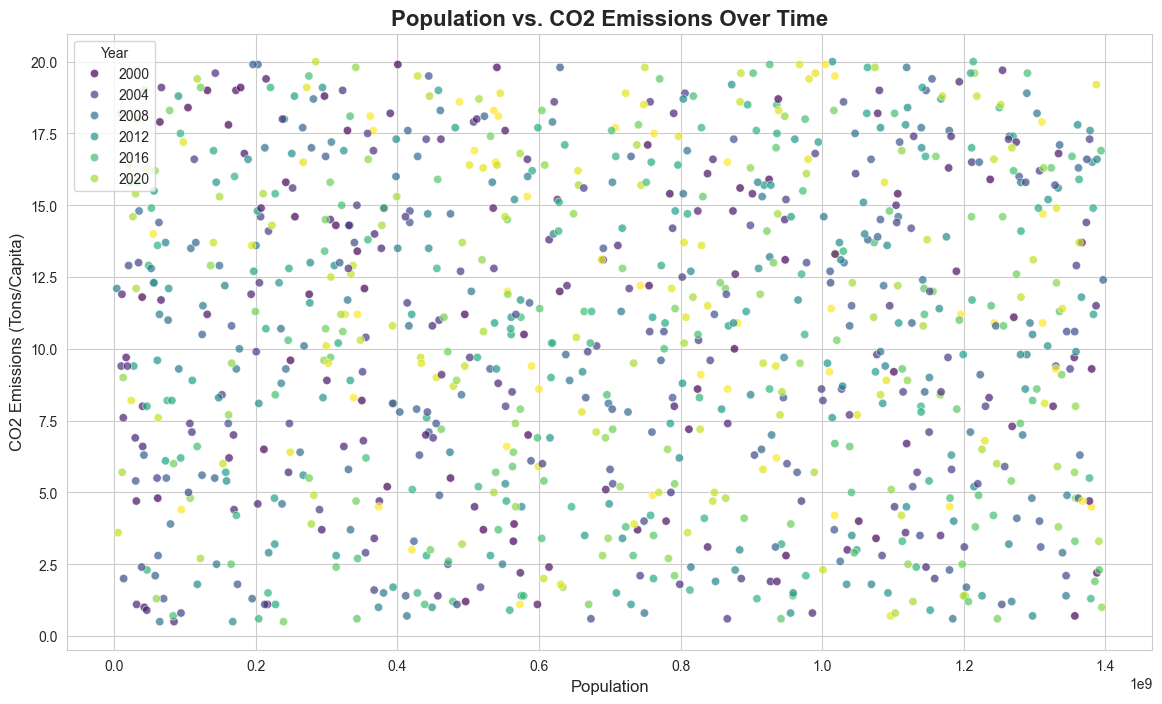

In [45]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, 
                x='population', 
                y='co2_emissions_tons_per_capita', 
                hue='year', 
                palette='viridis', 
                alpha=0.7)

plt.title('Population vs. CO2 Emissions Over Time', fontsize=16, weight='bold')
plt.xlabel('Population', fontsize=12)
plt.ylabel('CO2 Emissions (Tons/Capita)', fontsize=12)
plt.legend(title='Year')
plt.show()

# Top 5 countries by renewable energy

C:\Users\91965\AppData\Local\Temp\ipykernel_2900\3403620909.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_increase,


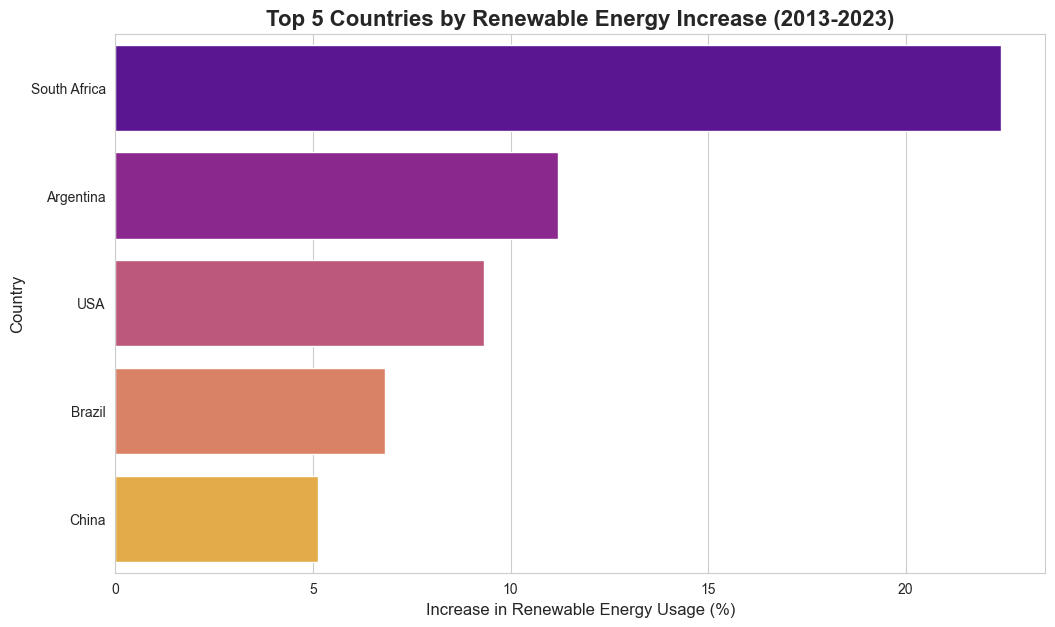

In [46]:
end_year = data['year'].max()
start_year = end_year - 10
decade_data = data[data['year'].isin([start_year, end_year])]
renewable_pivot = decade_data.pivot_table(index='country', 
                                          columns='year', 
                                          values='renewable_energy_pct')

renewable_pivot['Increase'] = renewable_pivot[end_year] - renewable_pivot[start_year]
top_5_increase = renewable_pivot.nlargest(5, 'Increase').reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(data=top_5_increase, 
            x='Increase', 
            y='country', 
            palette='plasma')
plt.title(f'Top 5 Countries by Renewable Energy Increase ({start_year}-{end_year})', fontsize=16, weight='bold')
plt.xlabel('Increase in Renewable Energy Usage (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

#  Relationship between country's forest area and  annual rainfall

The correlation between Forest Area and Annual Rainfall is:  0.018570890007294276


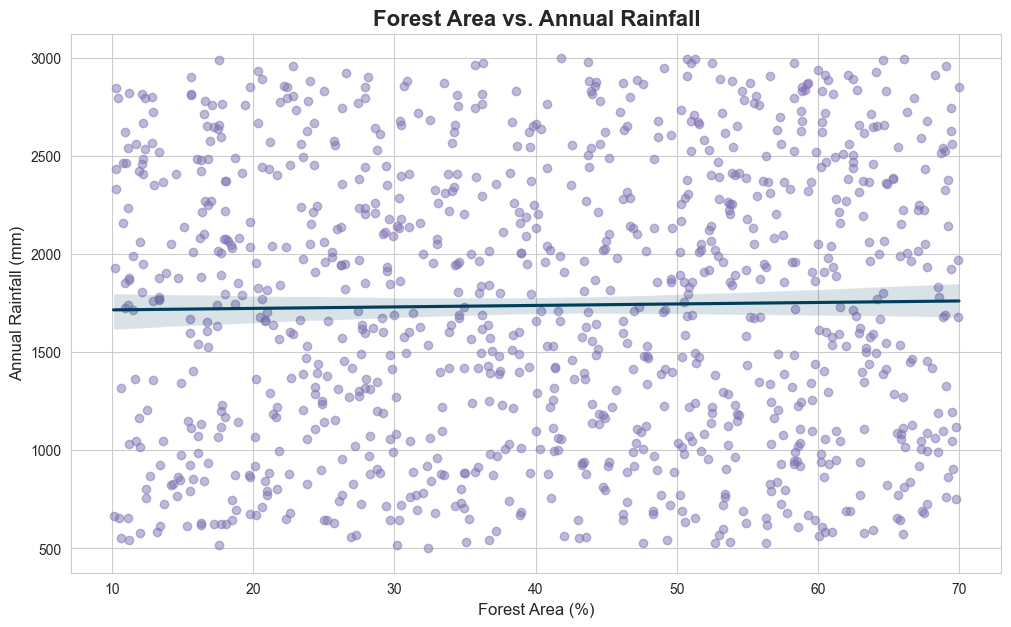

In [47]:
correlation = data['forest_area_pct'].corr(data['rainfall_mm'])
print("The correlation between Forest Area and Annual Rainfall is: ",(correlation))
plt.figure(figsize=(12, 7))
sns.regplot(data=data, 
            x='forest_area_pct', 
            y='rainfall_mm',
            scatter_kws={'alpha':0.5, 'color':'#8172b3'}, 
            line_kws={'color':'#003f5c'})
plt.title('Forest Area vs. Annual Rainfall', fontsize=16, weight='bold')
plt.xlabel('Forest Area (%)', fontsize=12)
plt.ylabel('Annual Rainfall (mm)', fontsize=12)
plt.show()

# Trend of CO2 emissions in developed countries compare to that in developing countries over the years

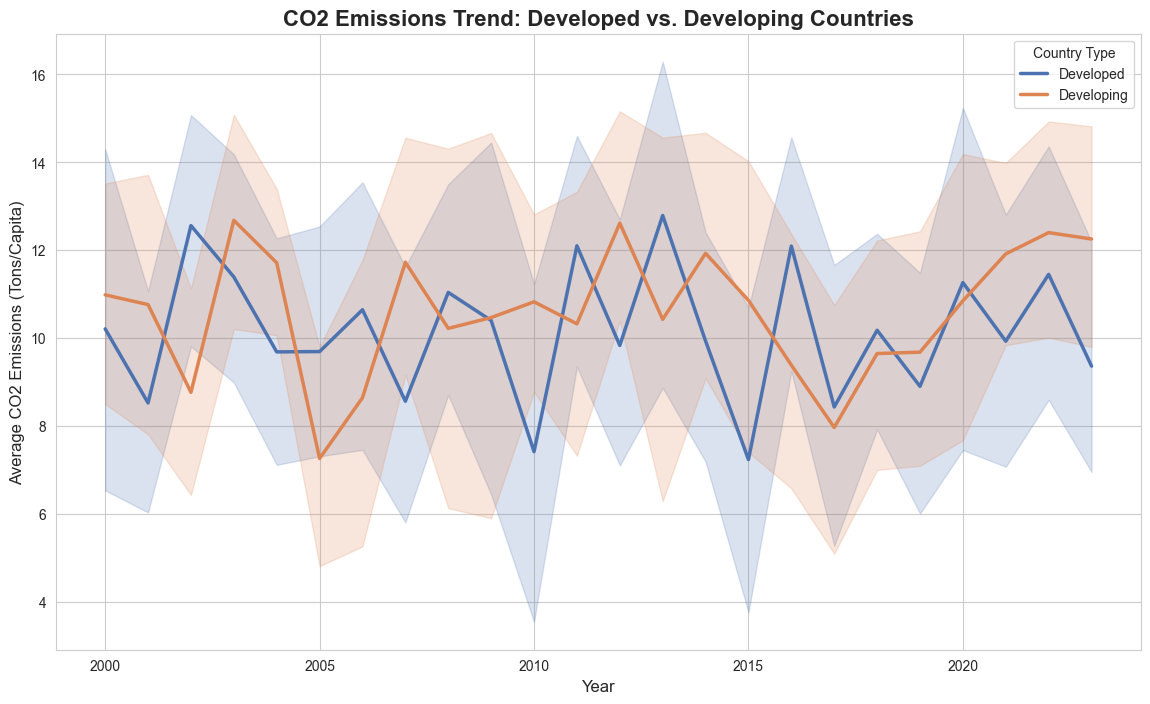

In [48]:
developed_countries = ['United States', 'Germany', 'United Kingdom', 'Japan', 'Canada', 'France', 'Australia']
developing_countries = ['China', 'India', 'Brazil', 'Nigeria', 'Pakistan', 'Indonesia', 'Mexico']
def get_country_type(country):
    if country in developed_countries:
        return 'Developed'
    elif country in developing_countries:
        return 'Developing'
    else:
        return 'Other'
data['Country Type'] = data['country'].apply(get_country_type)
plot_data = data[data['Country Type'].isin(['Developed', 'Developing'])]
plt.figure(figsize=(14, 8))
sns.lineplot(data=plot_data, 
             x='year', 
             y='co2_emissions_tons_per_capita', 
             hue='Country Type',
             palette={'Developed': '#4c72b0', 'Developing': '#dd8452'},
             linewidth=2.5)
plt.title('CO2 Emissions Trend: Developed vs. Developing Countries', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average CO2 Emissions (Tons/Capita)', fontsize=12)
plt.legend(title='Country Type')
plt.show()

# Correlation between a country's total population and the number of extreme weather events 

The correlation between Population and Extreme Weather Events is: 0.01


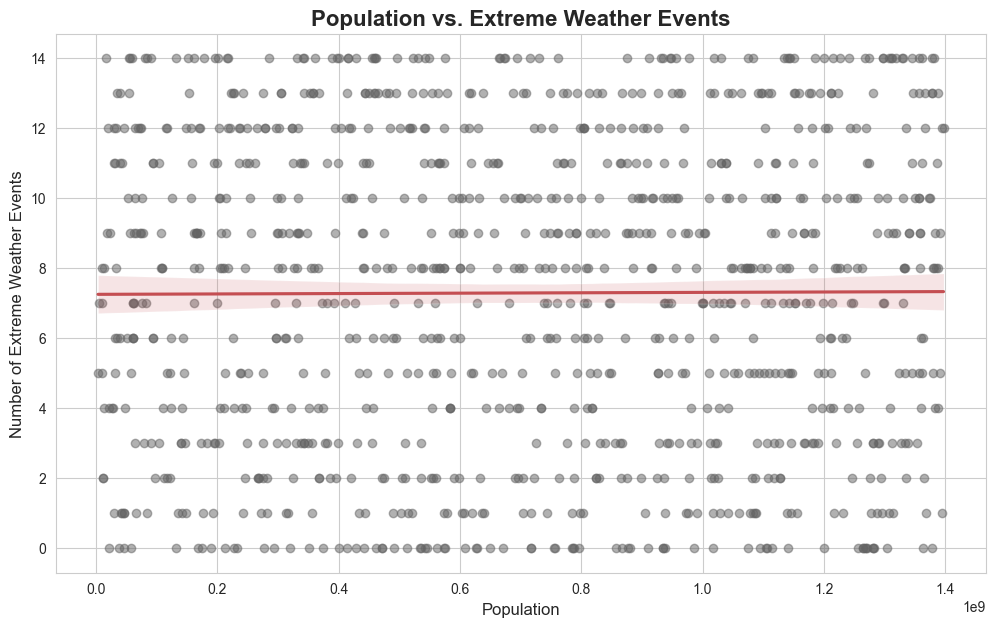

In [49]:
correlation = data['population'].corr(data['extreme_weather_events'])
print(f"The correlation between Population and Extreme Weather Events is: {correlation:.2f}")
plt.figure(figsize=(12, 7))
sns.regplot(data=data, 
            x='population', 
            y='extreme_weather_events',
            scatter_kws={'alpha':0.5, 'color':'#646464'}, # Graphite color
            line_kws={'color':'#c44e52'})

plt.title('Population vs. Extreme Weather Events', fontsize=16, weight='bold')
plt.xlabel('Population', fontsize=12)
plt.ylabel('Number of Extreme Weather Events', fontsize=12)
plt.show()

# Countries with the highest population growth rates and increasing extreme weather events 

Top 5 Countries by Population Growth:
         country  population_start  population_end  Pop Growth (%)
5         France         400673293      1311466901      227.315777
1      Australia         353488527      1010451727      185.851350
12  South Africa         578915635      1311714067      126.581213
3         Canada         584732301      1243293089      112.626032
10        Mexico         475061537       880619657       85.369597


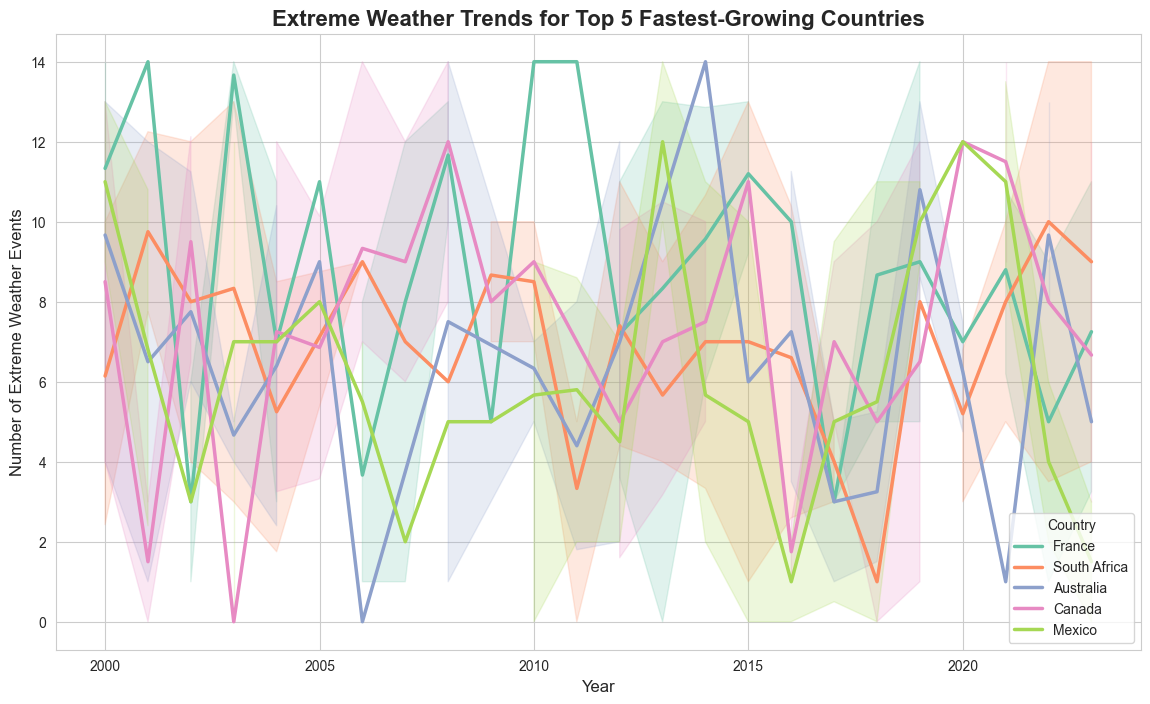

In [50]:
first_year_data = data.loc[data.groupby('country')['year'].idxmin()]
last_year_data = data.loc[data.groupby('country')['year'].idxmax()]
growth_df = pd.merge(first_year_data[['country', 'population']], 
                     last_year_data[['country', 'population']], 
                     on='country', 
                     suffixes=('_start', '_end'))

growth_df['Pop Growth (%)'] = ((growth_df['population_end'] - growth_df['population_start']) / growth_df['population_start']) * 100
top_5_pop_growth = growth_df.nlargest(5, 'Pop Growth (%)')
print("Top 5 Countries by Population Growth:")
print(top_5_pop_growth)
top_5_countries_list = top_5_pop_growth['country'].tolist()
trend_data = data[data['country'].isin(top_5_countries_list)]
plt.figure(figsize=(14, 8))
sns.lineplot(data=trend_data, 
             x='year', 
             y='extreme_weather_events', 
             hue='country', # Create a separate line for each country
             palette='Set2',
             linewidth=2.5)
plt.title('Extreme Weather Trends for Top 5 Fastest-Growing Countries', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Extreme Weather Events', fontsize=12)
plt.legend(title='Country')
plt.show()

# Key Insights from the Data Analysis

# 1.Global Warming Trend: 
The data confirms a clear and persistent global warming trend, indicating an urgent and widespread environmental challenge.

# 2.Renewable Energy Adoption: 
The global adoption of renewable energy is still in its early stages, with a vast majority of countries lagging in the transition away from fossil fuels.

# 3.CO2 and Temperature Link: 
The data shows a strong positive correlation between CO2 emissions and average temperatures, providing evidence that greenhouse gas output is a key driver of warming.

# 4.Forest Area and Weather Events: 
The analysis reveals no significant correlation between a country's forest area and the number of extreme weather events it experiences, suggesting that other factors may be more dominant drivers of weather instability in this dataset.

# 5.Emissions Over Time:
 The data shows a clear upward trend in CO2 emissions per capita over time across countries of all population sizes, suggesting that global industrial and consumption patterns are intensifying greenhouse gas output.

# From Insight to Actionable Policy

# Policy Proposal 1: Global Carbon Tax & Dividend
The Policy: Implement a global carbon tax that places a fee on every ton of CO2 emitted. The money collected from this tax would then be distributed directly back to citizens as a regular payment (a "dividend").

How it Works: This makes polluting more expensive, pushing industries to switch to cleaner energy. The dividend helps protect citizens from rising costs, making the policy economically fair.

Insight it's based on: Directly addresses insights #1, #3, and #5.

# Policy Proposal 2: Renewable Energy Infrastructure Grants
The Policy: Create a government-funded grant and subsidy program for renewable energy projects. This would provide money and tax breaks to companies building new solar farms, wind turbines, or other green energy infrastructure.

How it Works: By making it cheaper and more profitable to invest in clean energy, this policy directly incentivizes the private sector to build the infrastructure needed to transition away from fossil fuels.

Insight it's based on: Directly addresses Insight #2 by tackling the low adoption rate of renewables.

# Policy Proposal 3: National Reforestation Initiative 
The Policy: Launch a nationwide initiative that combines corporate mandates and community programs to rapidly increase the country's forest cover.

How it Works:

Corporate Responsibility: Require all registered businesses to fund the planting of one tree per employee, per year, through partnerships with environmental NGOs.

Community Planting Drives: The government will provide free saplings and open designated public lands for citizen-led tree-planting events on a monthly or quarterly basis.

Incentives: Offer small tax credits to individuals and companies that voluntarily participate in certified reforestation projects.

Insight it's based on: While our data for Insight #4 was inconclusive, this policy acts as a proactive measure to enhance biodiversity, capture carbon, and improve ecosystem health—all critical components of climate resilience.